<a href="https://colab.research.google.com/github/Hamsa-18/TNSIF_AIML_DBIT/blob/main/MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


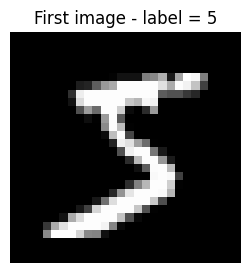

Label of first image: 5


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("x_test shape: ", x_test.shape)    # (10000, 28, 28)
print("y_test shape: ", y_test.shape)    # (10000,)

plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"First image - label = {y_train[0]}")
plt.axis('off')
plt.show()

print("Label of first image:", y_train[0])


In [16]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Before Normalization:")
print("Min pixel value:", x_train[0].min())
print("Max pixel value:", x_train[0].max())
print("First 10 pixel values (first row):", x_train[0][0][:10])

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
print("\nAfter Normalization:")
print("Min pixel value:", x_train[0].min())
print("Max pixel value:", x_train[0].max())
print("First 10 pixel values (first row):", x_train[0][0][:10])


Before Normalization:
Min pixel value: 0
Max pixel value: 255
First 10 pixel values (first row): [0 0 0 0 0 0 0 0 0 0]

After Normalization:
Min pixel value: 0.0
Max pixel value: 1.0
First 10 pixel values (first row): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
def build_model(activation='relu', optimizer='adam', include_32_layer=False):
    layers = [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dense(64, activation=activation)
    ]
    if include_32_layer:
        layers.append(keras.layers.Dense(32, activation=activation))
    layers.append(keras.layers.Dense(10, activation='softmax'))
    model = keras.models.Sequential(layers)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
model = build_model(activation='relu', optimizer='adam', include_32_layer=False)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_5 = model.fit(x_train_norm, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

train_acc_after_5 = history_5.history['accuracy'][-1]
print(f"Training accuracy after 5 epochs: {train_acc_after_5:.4f}")


model_10 = build_model()
history_10 = model_10.fit(x_train_norm, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)
train_acc_after_10 = history_10.history['accuracy'][-1]
print(f"Training accuracy after 10 epochs: {train_acc_after_10:.4f}")

Epoch 1/5
1688/1688 - 6s - 3ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9708 - val_loss: 0.1175
Epoch 2/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9911 - loss: 0.0267 - val_accuracy: 0.9727 - val_loss: 0.1100
Epoch 3/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9750 - val_loss: 0.1055
Epoch 4/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9747 - val_loss: 0.1069
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9785 - val_loss: 0.1039
Training accuracy after 5 epochs: 0.9941
Epoch 1/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9266 - loss: 0.2513 - val_accuracy: 0.9693 - val_loss: 0.1089
Epoch 2/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9683 - loss: 0.1059 - val_accuracy: 0.9717 - val_loss: 0.0955
Epoch 3/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9777 - loss: 0.0722 - val_accuracy: 0.9720 - val_loss: 0.0902
Epoch 4/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9839 - lo

In [7]:
test_loss, test_acc = model_10.evaluate(x_test_norm, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

print("Last training accuracy (10 epochs):", train_acc_after_10)
print("Test accuracy:", test_acc)
if train_acc_after_10 > test_acc:
    print("Training accuracy is higher -> possible slight overfitting.")
elif train_acc_after_10 < test_acc:
    print("Test accuracy is higher (uncommon) -> maybe random variation or small train/val split effect.")
else:
    print("Training and test accuracy are equal.")

313/313 - 1s - 2ms/step - accuracy: 0.9727 - loss: 0.1119
Test accuracy: 0.9727
Last training accuracy (10 epochs): 0.9934259057044983
Test accuracy: 0.9726999998092651
Training accuracy is higher -> possible slight overfitting.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted probabilities for first test image:
 [1.3510637e-10 1.0994100e-06 7.3423068e-09 4.4877344e-04 1.9932796e-14
 2.6817284e-07 1.8884151e-15 9.9954957e-01 3.8036843e-10 3.6452170e-07]
Predicted digit (argmax): 7
Predicted: 7 Actual: 7


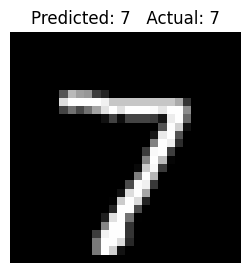

In [8]:
preds = model_10.predict(x_test_norm)
print("Predicted probabilities for first test image:\n", preds[0])
predicted_digit = np.argmax(preds[0])
print("Predicted digit (argmax):", predicted_digit)
print("Predicted:", predicted_digit, "Actual:", y_test[0])
plt.figure(figsize=(3,3))
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_digit}   Actual: {y_test[0]}")
plt.axis('off')
plt.show()

Changes


In [9]:
model_with_32 = build_model(include_32_layer=True)
history_with_32 = model_with_32.fit(x_train_norm, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=2)
print("Train accuracy (with extra 32-neuron layer):", history_with_32.history['accuracy'][-1])
test_loss32, test_acc32 = model_with_32.evaluate(x_test_norm, y_test, verbose=2)
print("Test accuracy (with extra 32-neuron layer):", test_acc32)

Epoch 1/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9225 - loss: 0.2591 - val_accuracy: 0.9682 - val_loss: 0.1125
Epoch 2/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9674 - loss: 0.1085 - val_accuracy: 0.9730 - val_loss: 0.0974
Epoch 3/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9770 - loss: 0.0750 - val_accuracy: 0.9693 - val_loss: 0.1032
Epoch 4/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9826 - loss: 0.0558 - val_accuracy: 0.9772 - val_loss: 0.0895
Epoch 5/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9854 - loss: 0.0444 - val_accuracy: 0.9730 - val_loss: 0.1047
Train accuracy (with extra 32-neuron layer): 0.9854444265365601
313/313 - 1s - 2ms/step - accuracy: 0.9691 - loss: 0.1172
Test accuracy (with extra 32-neuron layer): 0.9690999984741211


In [10]:
model_sgd = build_model(optimizer='sgd')
history_sgd = model_sgd.fit(x_train_norm, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=2)
print("Train acc (sgd):", history_sgd.history['accuracy'][-1])
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test_norm, y_test, verbose=2)
print("Test acc (sgd):", test_acc_sgd)

Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.8330 - loss: 0.6353 - val_accuracy: 0.9260 - val_loss: 0.2712
Epoch 2/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9139 - loss: 0.2995 - val_accuracy: 0.9392 - val_loss: 0.2174
Epoch 3/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9272 - loss: 0.2504 - val_accuracy: 0.9477 - val_loss: 0.1881
Epoch 4/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9364 - loss: 0.2178 - val_accuracy: 0.9538 - val_loss: 0.1673
Epoch 5/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9436 - loss: 0.1931 - val_accuracy: 0.9580 - val_loss: 0.1522
Train acc (sgd): 0.9436296224594116
313/313 - 1s - 3ms/step - accuracy: 0.9460 - loss: 0.1811
Test acc (sgd): 0.9459999799728394


In [11]:
model_1epoch = build_model()
history_1epoch = model_1epoch.fit(x_train_norm, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=2)
print("Train acc after 1 epoch:", history_1epoch.history['accuracy'][-1])

1688/1688 - 6s - 4ms/step - accuracy: 0.9272 - loss: 0.2490 - val_accuracy: 0.9660 - val_loss: 0.1081
Train acc after 1 epoch: 0.9272222518920898


In [12]:
model_tanh = build_model(activation='tanh')
history_tanh = model_tanh.fit(x_train_norm, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=2)
print("Train acc (tanh):", history_tanh.history['accuracy'][-1])
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(x_test_norm, y_test, verbose=2)
print("Test acc (tanh):", test_acc_tanh)

Epoch 1/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9188 - loss: 0.2790 - val_accuracy: 0.9595 - val_loss: 0.1406
Epoch 2/5
1688/1688 - 9s - 6ms/step - accuracy: 0.9619 - loss: 0.1276 - val_accuracy: 0.9677 - val_loss: 0.1098
Epoch 3/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9755 - loss: 0.0834 - val_accuracy: 0.9720 - val_loss: 0.0933
Epoch 4/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9834 - loss: 0.0581 - val_accuracy: 0.9742 - val_loss: 0.0860
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9888 - loss: 0.0407 - val_accuracy: 0.9755 - val_loss: 0.0836
Train acc (tanh): 0.9888333082199097
313/313 - 1s - 2ms/step - accuracy: 0.9723 - loss: 0.0922
Test acc (tanh): 0.9722999930381775


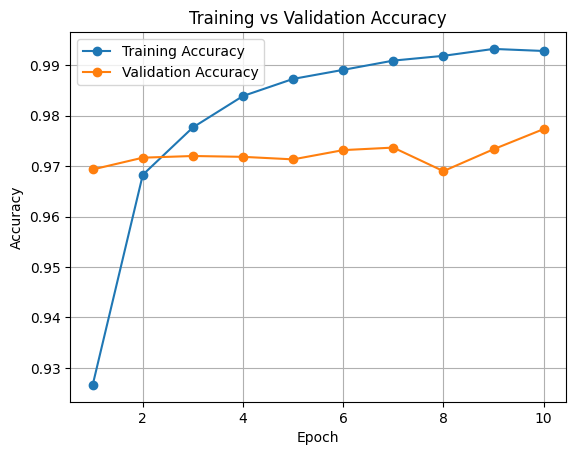

In [19]:
import matplotlib.pyplot as plt
train_acc = history_10.history['accuracy']
val_acc = history_10.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'o-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'o-', label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()